# 机器学习实验一

### 获取数据集

In [66]:
import pandas as pd
import numpy as np

# 设置数据文件的路径
data_path = "boston_house_prices.csv"

# 使用逗号作为分隔符加载数据
raw_df = pd.read_csv(data_path, sep=",")

# 将第一行设置为列头
raw_df.columns = raw_df.iloc[0]
raw_df = raw_df[1:]  # 删除重复的列名行

# 转换数据类型为数值型，方便处理
raw_df = raw_df.apply(pd.to_numeric, errors='coerce')

# 提取特征值 X 和目标值 y
X = raw_df.drop(columns=["MEDV"])  # 移除目标列以分离特征
y = raw_df["MEDV"].values  # 将目标值列提取为数组

# 打印数据结构和一些样本以确认
print(raw_df.head())
print(X.head())
print(y[:5])




# 波士顿房价数据集是一个用于回归分析的数据集，其中包含506个观测值，每个观测值都有13个特征和1个目标值。
# 这13个特征值包括：
# CRIM：城镇人均犯罪率。
# ZN：大于25,000平方英尺的住宅土地的比例。
# INDUS：城镇非零售业务地区的比例。
# CHAS：查尔斯河虚拟变量（如果土地在河边，则为1；否则为0）。
# NOX：一氧化氮浓度。
# RM：住宅平均房间数。
# AGE：1940年以前建造的自住房屋的比例。
# DIS：到波士顿五个就业中心的加权距离。
# RAD：径向公路可达性指数。
# TAX：每10,000美元的全额财产税率。
# PTRATIO：城镇学生与教师比例。
# B：1000(Bk - 0.63)^2，其中Bk是城镇黑人的比例。
# LSTAT：人口中低收入者的比例。
# 目标值/标签值是：
# MEDV：自有住房的中位数价值（以1000美元计）。

# 波士顿房价数据集的特征值是这13个与房价相关的特征，而标签值是房价的中位数价值
X.shape, y.shape

0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

0       B  LSTAT  MEDV  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  
0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8

((506, 13), (506,))

### 划分数据

In [67]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train_test_split 方法,设定数据划分数据集比例，进行数据集划分
# test_size=0.2表示测试集占总数据集的20%,也就是说，80%的数据用于训练，20%的数据用于测试(比例默认为0.25)
# random_state=42是随机数种子。设置随机数种子可以保证每次运行代码时，数据的划分结果相同,保证可重复性


### 数据归一化(z-score标准化)

In [68]:
from sklearn import preprocessing
import numpy as py

# 将列特征转化为标准正态分布，和整体分布相关，每个样本点都能对标准化产生影响
# 对于每个数值特征，算出它的均值（mean）和标准差（std）
# Z = (X - mean) / std
scaler = preprocessing.StandardScaler().fit(X_train) # 统计训练集的均值、方差
X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)
# 将每一个特征都转化为标准正态分布
# 标准化的主要目的是消除不同特征之间的尺度差异，让每个特征都处在同样的尺度上

# 用归一化的数据代替原始数据
X_train = X_train_std
X_test  = X_test_std

至此完成数据预处理

### 线性回归模型
#### 正规方程求解线性回归

Linear Regression fitting time: 0.0 seconds
Training MSE:  21.641412753226312
Testing MSE:   24.291119474973517
Training R^2:  0.7508856358979673
Testing R^2:  0.668759493535632


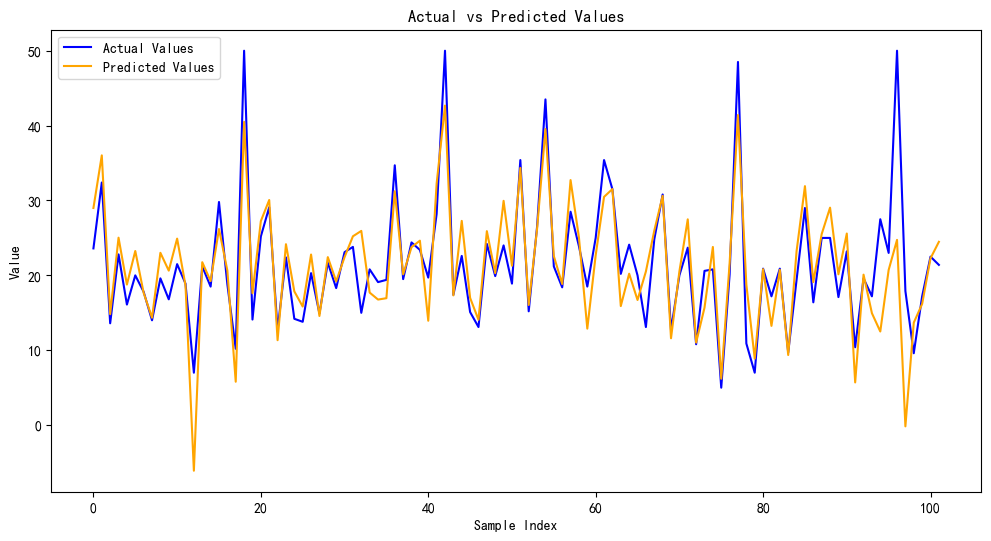

Coefficients:
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Intercept: 22.796534653465343


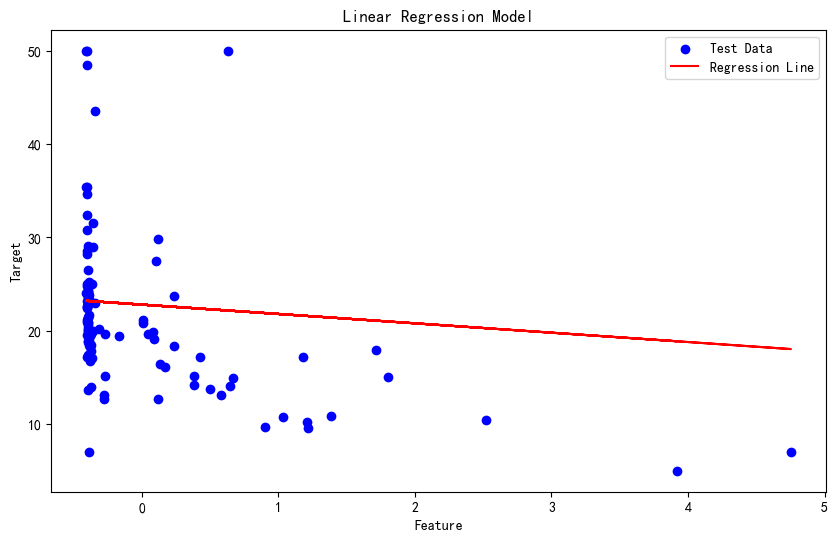

In [69]:
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

reg = LinearRegression()# 初始化线性回归模型
start_time = time.time()# 记录起始时间
reg.fit(X_train, y_train)# 拟合训练数据
print("Linear Regression fitting time:", time.time() - start_time, "seconds")# 打印拟合过程所耗时间
y_pred = reg.predict(X_test)# 使用测试集进行预测

# 计算训练集和测试集的均方误差（MSE）
train_mse = mean_squared_error(y_train, reg.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

# 打印训练集和测试集的MSE
print("Training MSE: ", train_mse)
print("Testing MSE:  ", test_mse)

# 计算训练集和测试集的R²（决定系数）
train_r2 = r2_score(y_train, reg.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

# 打印训练集和测试集的R²
print("Training R^2: ", train_r2)
print("Testing R^2: ", test_r2)

# 绘制真实值和预测值的折线图
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='orange')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.show()

# 获取模型系数和截距
coefficients = reg.coef_
intercept = reg.intercept_

# 打印模型系数和截距
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

# 绘制线性回归模型的图像
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Test Data')
plt.plot(X_test[:, 0], coefficients[0] * X_test[:, 0] + intercept, color='red', label='Regression Line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

 从这个图像中可以看出，正规方程得到的的线性回归模型并不能很好地拟合数据，因为数据的分布并不是线性的，所以这个方法并不适合这个数据集

#### 梯度下降法求解线性回归问题

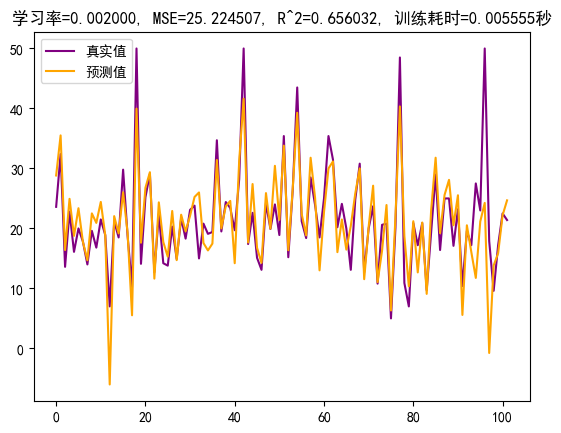

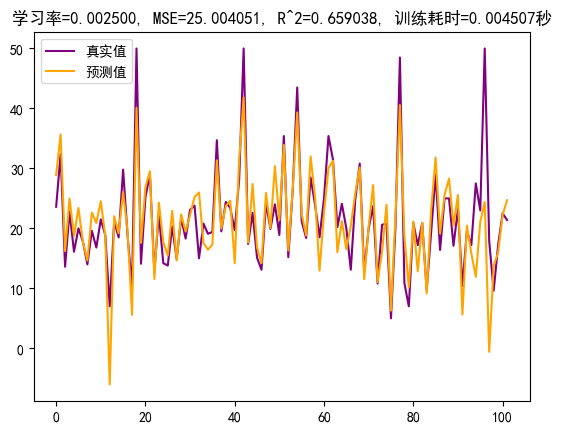

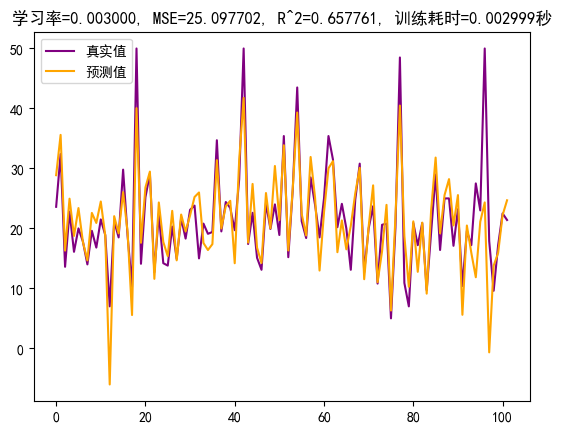

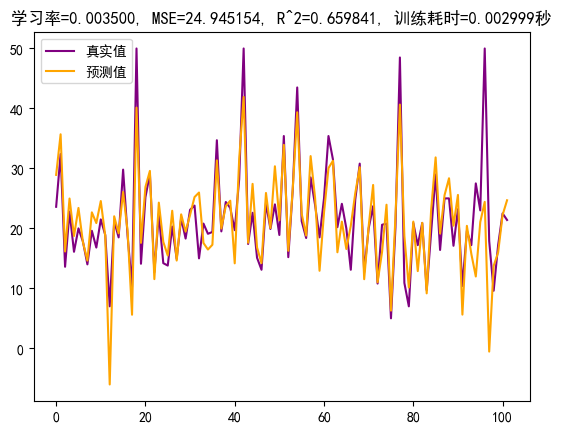

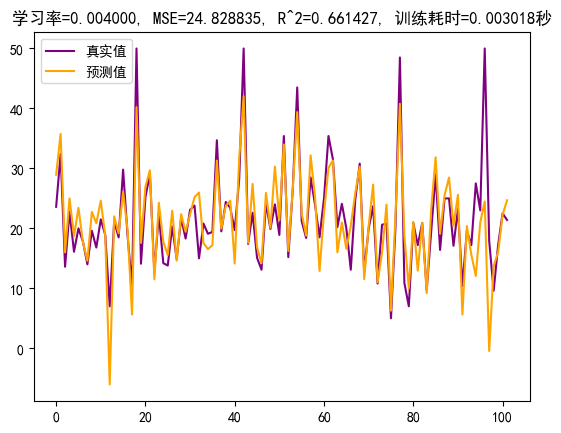

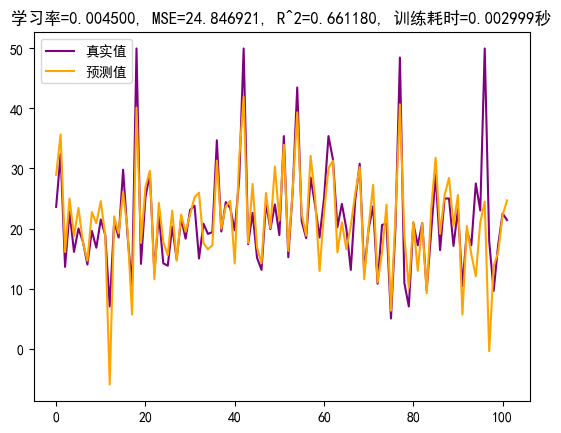

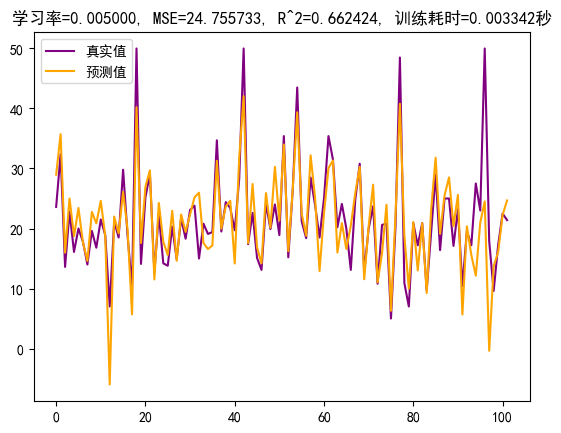

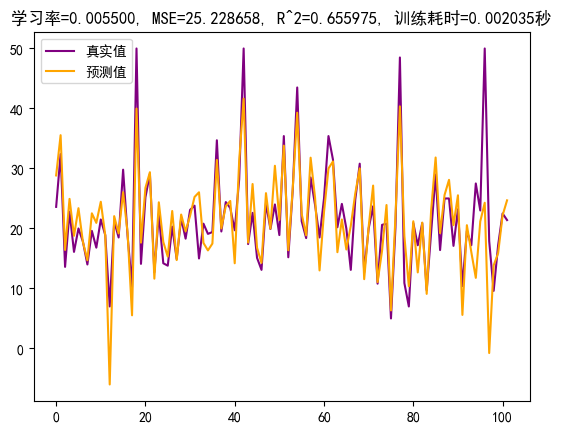

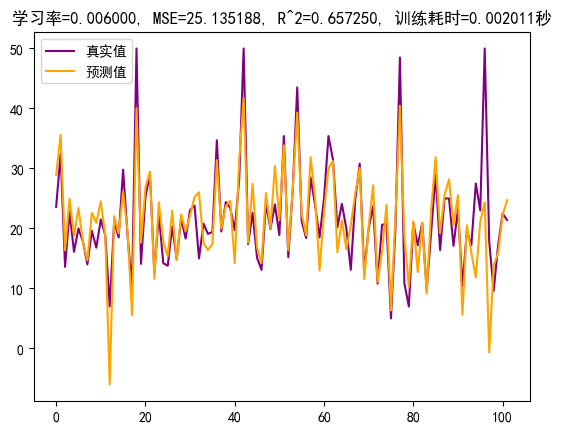

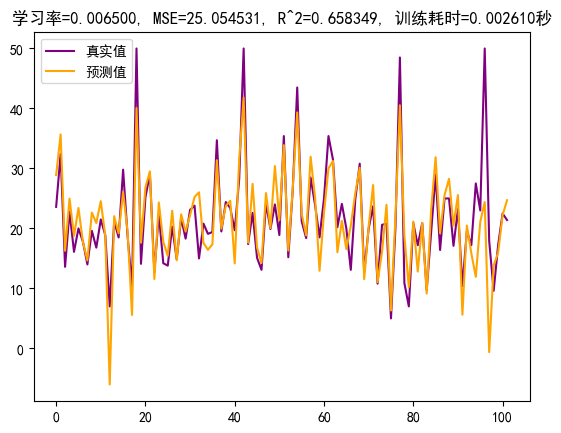

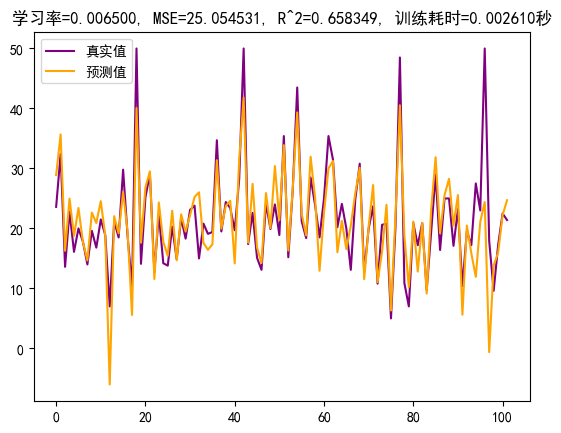

R2: 0.749384748659065
coef:
 [-0.90158104  0.49285972 -0.00631569  0.76490925 -1.75383491  3.26184982
 -0.19531696 -2.82857441  1.37910373 -0.87348503 -1.96813398  1.13438027
 -3.5867964 ]
intercept: [22.81140031]
MSE: 25.054530831361923
params: {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.006500000000000001, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


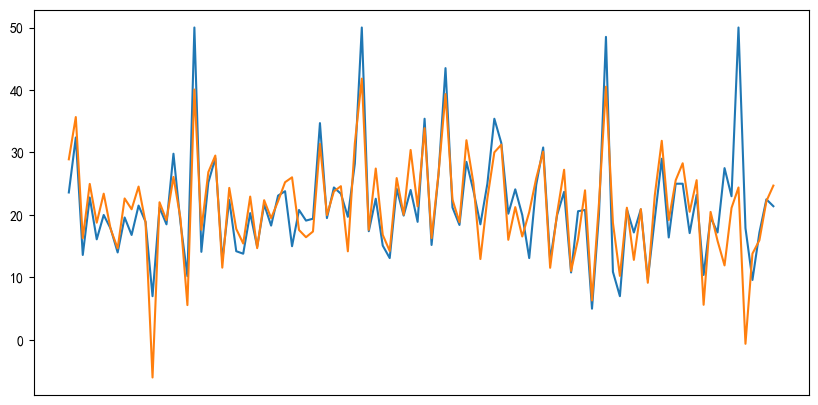

In [70]:
from sklearn.linear_model import SGDRegressor
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# 随机梯度下降算法在每次更新中根据一个样本计算损失函数的梯度
# 其优点是运行速度快，适用于大批量数据训练。 
# SGDRegressor 可以支持不同的 loss函数和正则化惩罚项来拟合线性回归模型。

# 设置字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 设置多次循环次数和初始学习率
iterations = 10
initial_eta = 0.0005

# 存储预测结果
y_predict_list = []

# 对不同学习率进行模型训练和评估
for i in range(iterations):
    eta = initial_eta * (i + 4) # 设置当前学习率
    reg = SGDRegressor(eta0=eta, random_state=42)# 创建SGDRegressor模型，设置学习率和随机种子
    
    start_time = time.time()# 记录起始时间
    
    reg.fit(X_train, y_train)# 拟合模型
    y_predict = reg.predict(X_test)# 预测测试集
    y_predict_list.append(y_predict)# 记录预测结果
    
    elapsed_time = time.time() - start_time# 计算训练时间
    
    # 计算MSE和R²
    test_mse = mean_squared_error(y_test, y_predict)
    test_r2 = r2_score(y_test, y_predict)
    
    # 绘制真实值和预测值的折线图
    plt.figure()
    plt.plot(y_test, label='真实值', color='purple')
    plt.plot(y_predict, label='预测值', color='orange')
    plt.legend()
    plt.title(f"学习率={eta:.6f}, MSE={test_mse:.6f}, R^2={test_r2:.6f}, 训练耗时={elapsed_time:.6f}秒")

# 绘制最后一次测试集和预测值的折线图
plt.figure()
plt.plot(y_test, label='真实值', color='purple')
plt.plot(y_predict, label='预测值', color='orange')
plt.legend()
plt.title(f"学习率={eta:.6f}, MSE={test_mse:.6f}, R^2={test_r2:.6f}, 训练耗时={elapsed_time:.6f}秒")
plt.show()

# 查看训练完成后的SGDRegressor模型的系数和截距
print("R2:",reg.score(X_train, y_train))# R^2
print("coef:\n",reg.coef_)# 系数
print("intercept:",reg.intercept_)# 偏置
print("MSE:",mean_squared_error(y_test, y_predict))# 均方误差
print("params:",reg.get_params())# 参数

# 可视化
plt.figure(figsize=(10,5))
plt.plot(y_test)
plt.plot(y_predict)
plt.xticks(())
plt.show()

### 修改训练集和测试集的比例

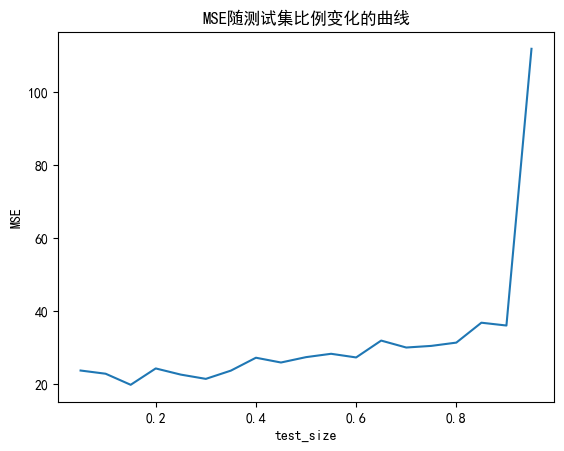

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data_file = r"boston_house_prices.csv"
with open(data_file, encoding='utf-8') as f:
    data = np.loadtxt(data_file, delimiter=',', skiprows=2)
X = data[:, :-1]    # X：数据集的特征值
y = data[:, -1]     # y：数据集的标签值
test_MSE_list = []
rates = np.linspace(0.05,0.95,19).tolist()  # np.linspace生成一个包含19个值的列表，表示测试集比例的变化范围（从0.05到0.95）
for rate in rates:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=rate, random_state=54)
    std_scaler = preprocessing.StandardScaler().fit(X_train) # 统计训练集的均值、方差
    X_train_std = std_scaler.transform(X_train)
    X_test_std  = std_scaler.transform(X_test)
    
    # 用归一化的数据代替原始数据
    X_train = X_train_std
    X_test  = X_test_std
    reg = LinearRegression()            # 创建对象,采用的还是正规方程法
    reg.fit(X_train, y_train)           # 拟合
    y_predict = reg.predict(X_test)     # 测试集预测值
    test_MSE_list.append(mean_squared_error(y_test, y_predict))
plt.plot(rates,test_MSE_list)
plt.xlabel("test_size")
plt.ylabel("MSE")
plt.title("MSE随测试集比例变化的曲线")
plt.show()
# 由结果图可以看出，当测试集比例在0.05到0.15之间时，MSE值较小，说明模型的预测能力较好
# 当测试集比例大于0.15时，MSE值逐渐增大，说明模型的预测能力变差
# 因为训练集的数据越多，模型的训练效果才越好，所以测试集比例越大，模型的预测能力越差

### 其他线性回归模型
#### Lasso

训练集相关系数:  0.9288132515243274
测试集MSE:  69.7909090945629
测试集R²:  0.18962577021764915


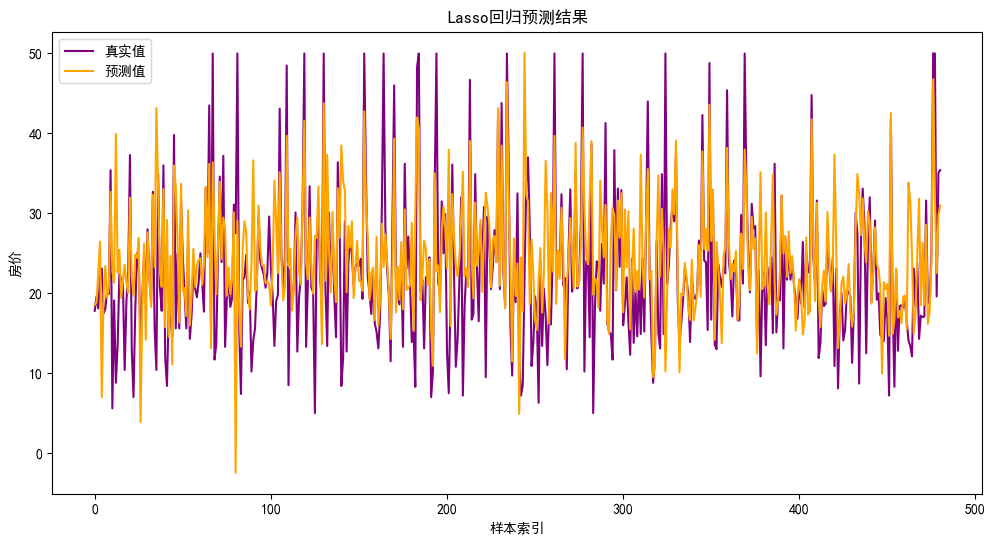

In [72]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 创建一个Pipeline对象，包含两个步骤：首先，使用StandardScaler对特征进行标准化；
# 然后，使用Lasso进行回归。这个Pipeline对象就相当于一个带有Lasso正则化的线性回归模型
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# 用训练数据来训练这个Pipeline
pipeline.fit(X_train, y_train)

# 在测试集上进行预测
y_predict = pipeline.predict(X_test)

# 计算相关系数（R²得分）和均方误差（MSE）
train_score = pipeline.score(X_train, y_train)
test_mse = mean_squared_error(y_test, y_predict)
test_r2 = r2_score(y_test, y_predict)

# 打印相关系数和均方误差
print('训练集相关系数: ', train_score)
print("测试集MSE: ", test_mse)
print("测试集R²: ", test_r2)

# 绘制真实值和预测值的折线图
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='真实值', color='purple')
plt.plot(y_predict, label='预测值', color='orange')
plt.legend()
plt.title("Lasso回归预测结果")
plt.xlabel("样本索引")
plt.ylabel("房价")
plt.show()

# 通过调节Lasso模型中的alpha参数，可以控制正则化的强度，避免过拟合或欠拟合
# 较高的alpha值会增加正则化力度，减少过拟合的风险，但可能导致欠拟合
# 较低的alpha值会减少正则化力度，模型可能更好地拟合训练数据，但可能导致过拟合


#### Ridge

{'alpha': 5}
-30.986120973531854
test_MSE:  126.55507028531561


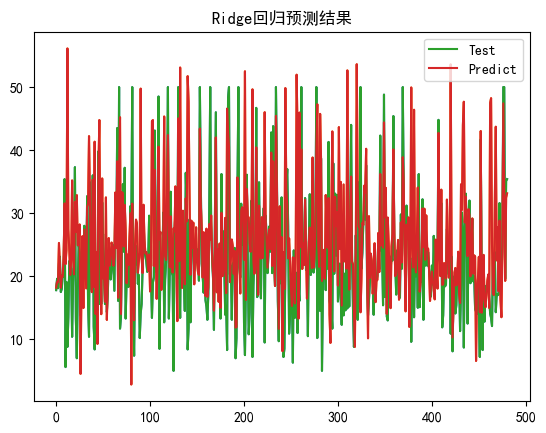

In [73]:
from sklearn.linear_model import Ridge
# 这段代码使用了Ridge回归模型，这是一种线性回归模型，
# 在多元线性回归基础上加入了L2正则项，针对模型中存在的共线性关系的为变量增加一个小的平方偏差因子，防止不同特征之间相互关联影响模型训练，来约束模型的权重
# 这里的alpha参数就是正则化项的强度，alpha的值越大，正则化项的影响就越大。在这个例子中，alpha的值被设置为0.5。

from sklearn.model_selection import GridSearchCV

# 定义要搜索的alpha值
parameters = {'alpha': [1e-10, 1e-5, 1e-4, 1e-3,1e-2, 1, 5, 10,11, 20]}
ridge = Ridge()
# 创建GridSearchCV对象，使用折交叉验证（cv=5），训练数据被分成了5份，
# 每次都使用其中的4份来训练模型，然后在剩下的1份上进行验证，这样一共可以进行5次训练和验证，更准确地评估模型的性能
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
# 使用GridSearchCV对象拟合数据
ridge_regressor.fit(X_train, y_train)
# 打印最优的alpha值
print(ridge_regressor.best_params_)
# 打印最优模型的MSE
print(ridge_regressor.best_score_)
# 使用最优模型在测试集上进行预测
y_predict = ridge_regressor.predict(X_test)

# 计算并打印测试集上的MSE
reg = Ridge(alpha=.5)            # 创建对象
reg.fit(X_train, y_train)           # 拟合
y_predict = reg.predict(X_test)     # 测试集预测值
print("test_MSE: ",mean_squared_error(y_test, y_predict))



plt.title("Ridge回归预测结果")
plt.plot(y_test)
plt.plot(y_predict)
plt.plot(y_test,label='Test')
plt.plot(y_predict,label='Predict')
plt.legend() # 添加图例

plt.show()
# 最终在测试集上的均方误差比直接多元线性回归小一些，说明正则项损失函数是比较有效的

#### 多项式回归

相关系数:  1.0
test_MSE:  121108342215.88416


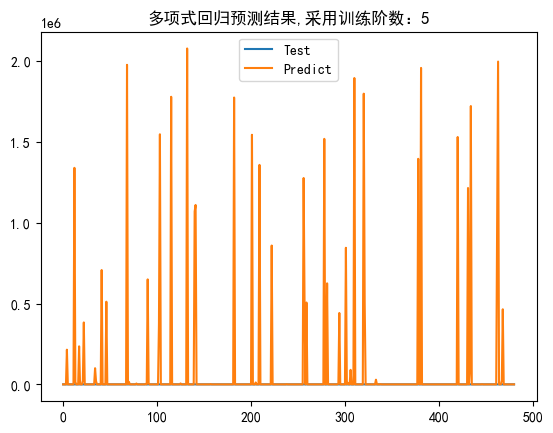

In [74]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 
# Pipeline是一个包装器，用于封装多个处理步骤，以便它们可以被当作一个整体来使用

# 首先利用PolynomialFeatures构建数据集的各阶幂，再利用之前的多元线性回归LinearRegression()进行拟合
# 创建一个Pipeline对象，包含两个步骤：首先，使用PolynomialFeatures生成2阶的多项式特征；
# 然后，使用LinearRegression进行回归。这个Pipeline对象就相当于一个2阶的多项式回归模型
pipeline = make_pipeline(PolynomialFeatures(5), LinearRegression())
# 当模型多项式阶数大于2阶，相关系数为 1.0，表示在训练集上模型的拟合效果非常好，然而测试集上的均方误差却相当高
# 这是过拟合（overfitting）的表现，这里选用1阶

# 用训练数据来训练这个Pipeline。
# 这个过程包括两个步骤：首先，使用PolynomialFeatures对训练数据进行转换，生成 2 阶的多项式特征；然后，使用LinearRegression拟合这些特征和目标值
pipeline.fit(X_train,y_train)                                      #训练模型 
y_predict = pipeline.predict(X_test)#在测试集上预测结果并保存在pred变量中 
score = pipeline.score(X_train,y_train)#计算相关系数 
print('相关系数: ', score) 
print("test_MSE: ",mean_squared_error(y_test, y_predict))

plt.plot(y_test,label='Test')
plt.plot(y_predict,label='Predict')
plt.legend() # 添加图例

plt.title("多项式回归预测结果,采用训练阶数：{}".format(5))
plt.show()
# 经过测试发现，PolynomialFeatures(n)中阶数n=2时效果尚可，比直接线性回归稍差一些。当n>=3时会发散，即过拟合